In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

In [4]:
propeller = pd.read_csv('propeller_data.csv')
nb_aerofoil = 4

In [5]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [8]:
planes, delta_d = get_planes(upper_blade, dmiddle, dlowest, vect_length, nb_aerofoil + 1) #get equations of planes for projection

In [11]:
planes

[array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.89304487e-14]),
 array([  0.        ,   0.        ,   1.        , -25.33680186]),
 array([  0.        ,   0.        ,   1.        , -50.67360373]),
 array([  0.        ,   0.        ,   1.        , -76.01040559]),
 array([   0.        ,    0.        ,    1.        , -101.34720746]),
 array([   0.        ,    0.        ,    1.        , -126.58400932])]

In [9]:
all_plane_points = get_points(upper_blade, planes)                  #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4


In [10]:
print(len(all_plane_points))
print(len(all_plane_points[0]))
print(len(all_plane_points[1]))

4
20
23


In [22]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

In [23]:
x_list, y_right_list, y_left_list, right_pts, left_pts, position, rm = get_generated_points(right_param, left_param, right_pts, left_pts, delta_d)

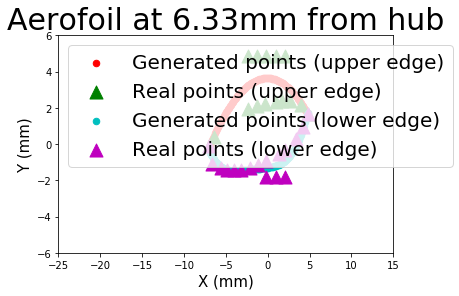

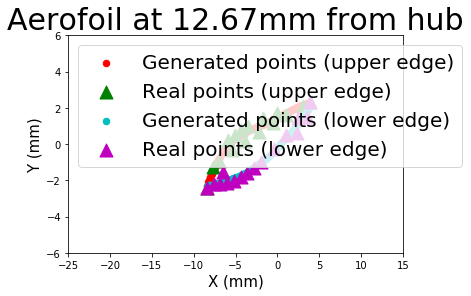

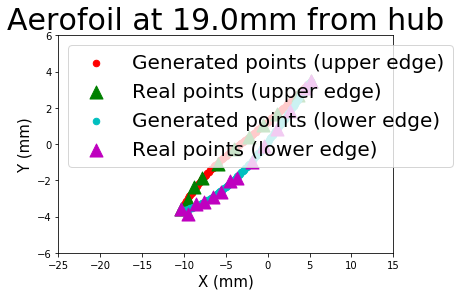

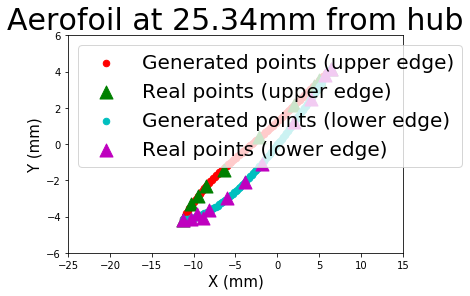

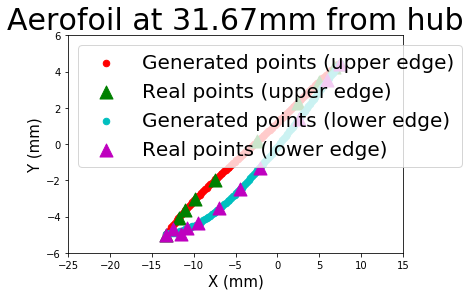

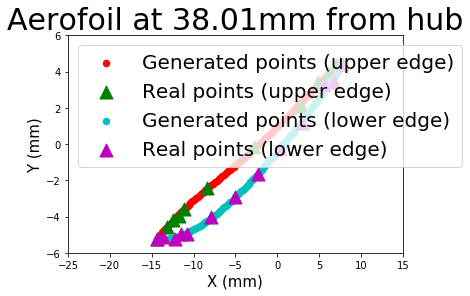

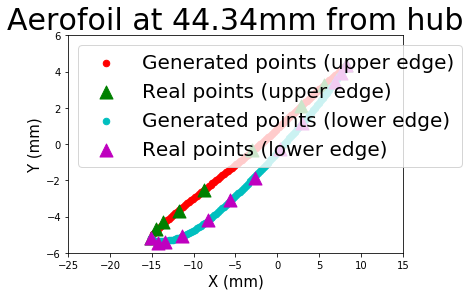

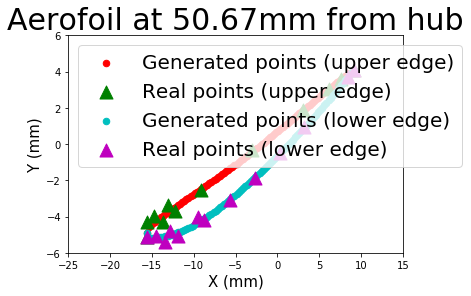

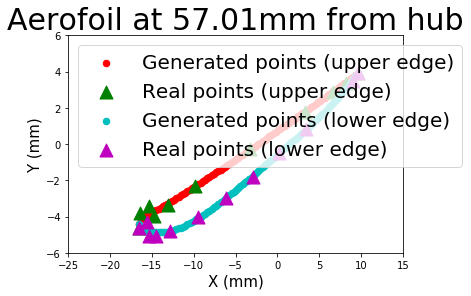

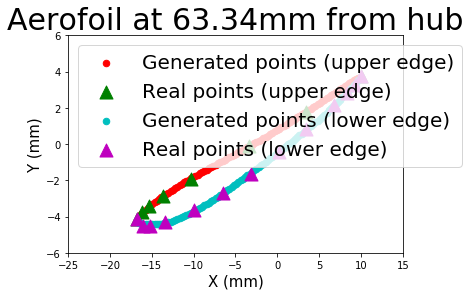

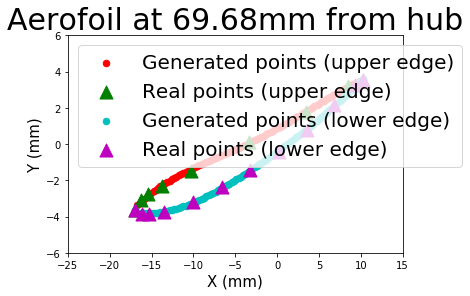

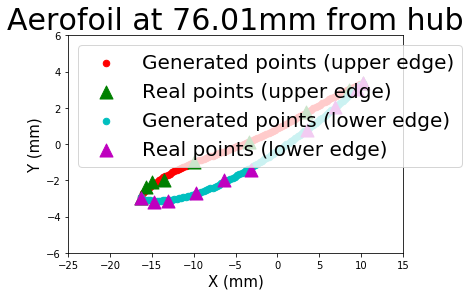

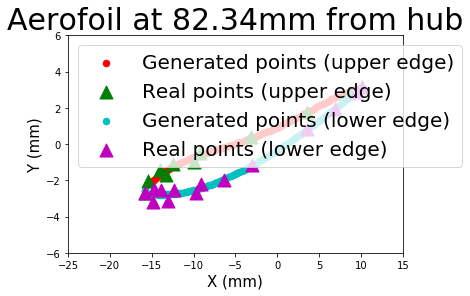

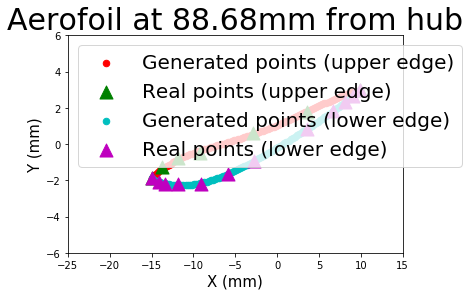

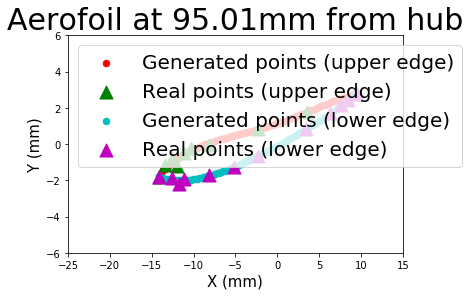

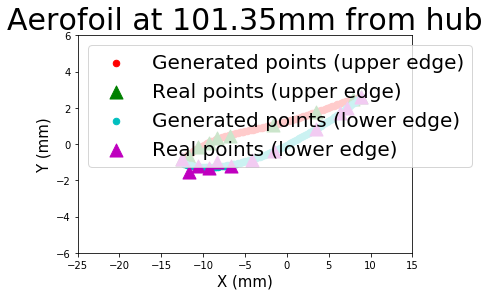

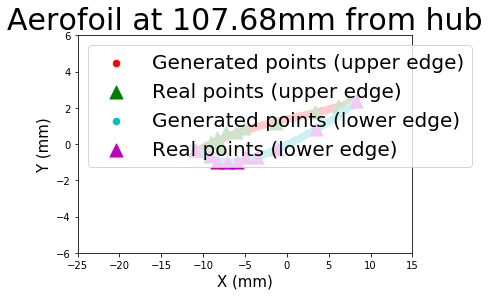

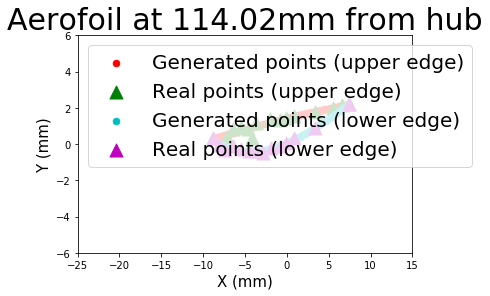

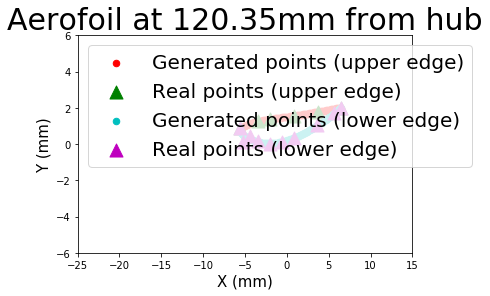

In [26]:
for i in range(len(all_plane_points) - rm):
    plot_interpolation_both_sides( right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "Aerofoil at " + str(round(position[i], 2)) + "mm from hub" )

In [ ]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [80]:
hub_inner_radius = get_hub_inner_radius(propeller_coords, vect_length)
hub_radius = param_hub_radius(propeller_coords, vect_length)
print(hub_radius)

8.098715634048968


### Tip radius

In [81]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80676910381526


### Blade twist

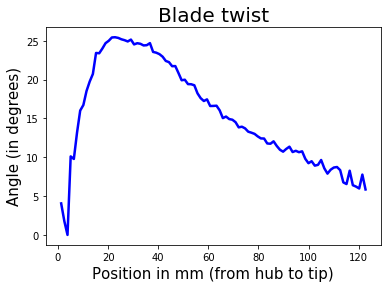

In [82]:
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)
plot_blade_twist(blade_twist, position)

### Chord length

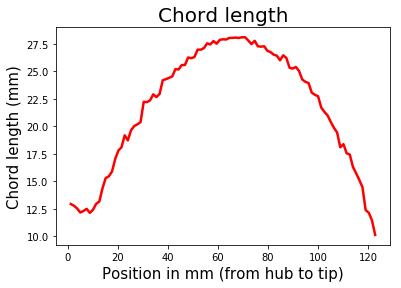

In [83]:
chord_length = get_chord_length(x_list, y_right_list, y_left_list)
plot_chord_length(chord_length, position)

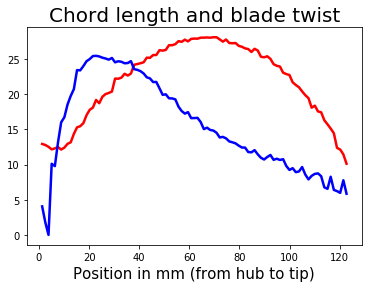

In [84]:
plot_chord_blade(chord_length, blade_twist, position)

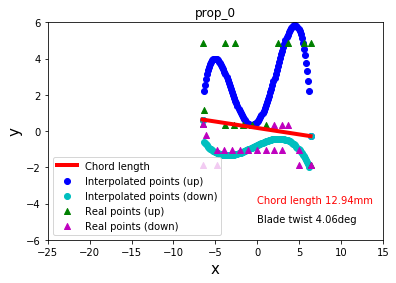

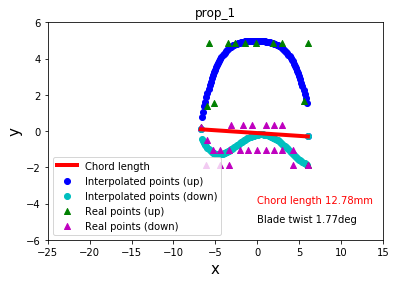

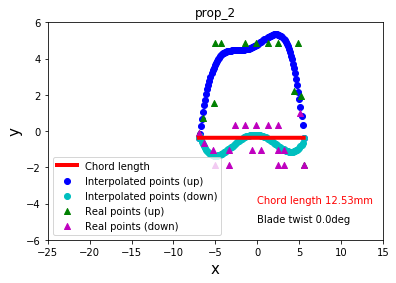

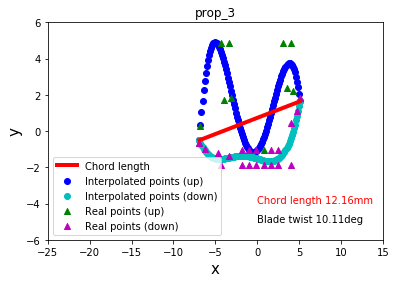

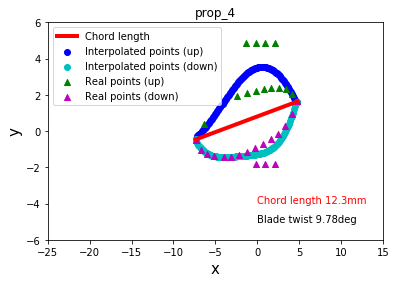

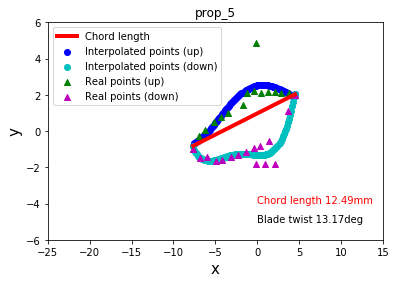

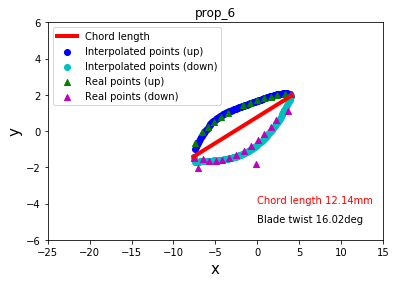

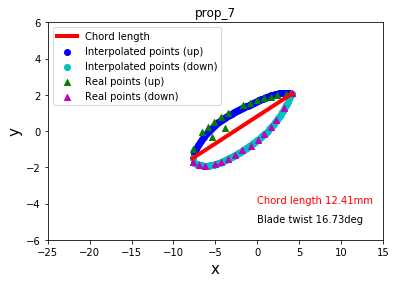

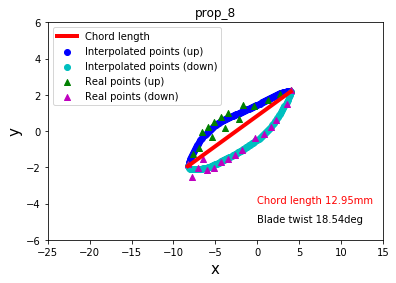

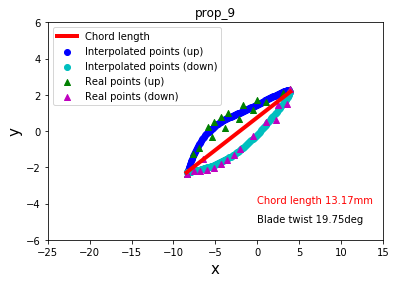

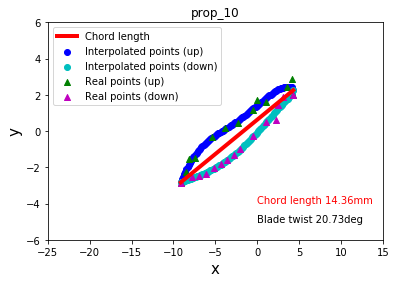

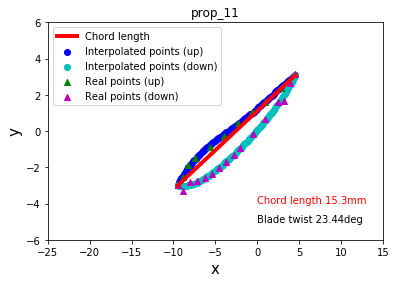

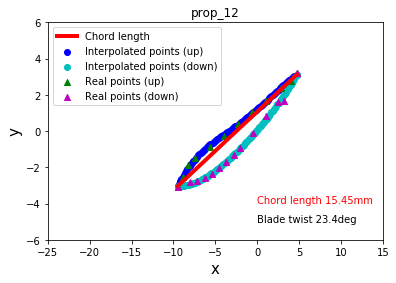

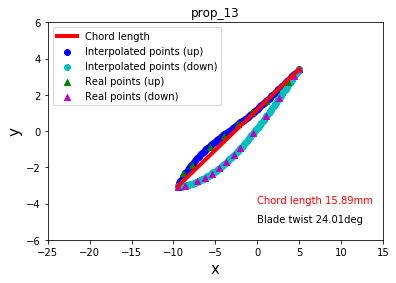

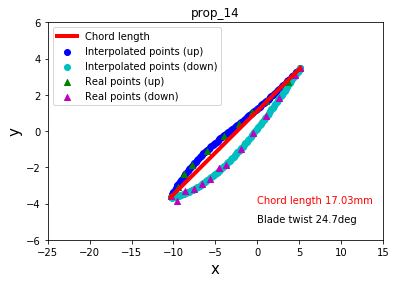

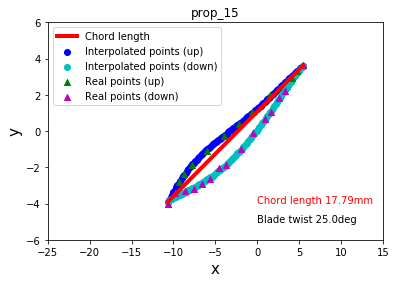

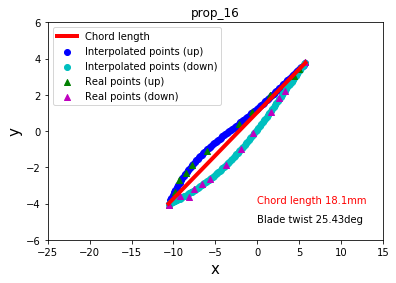

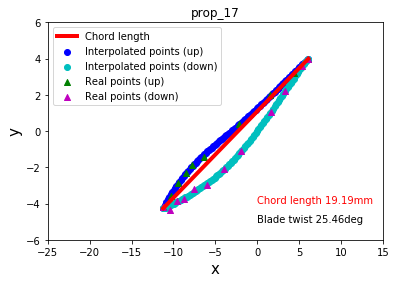

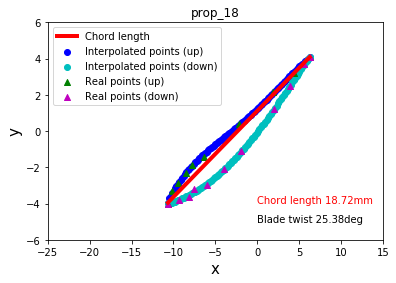

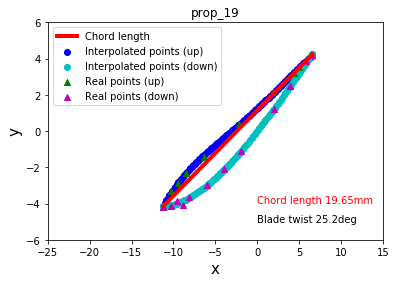

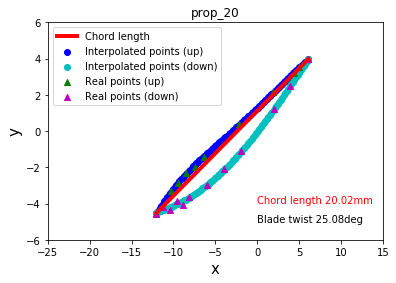

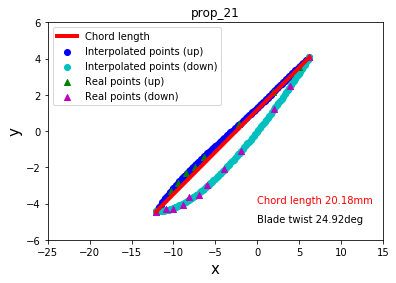

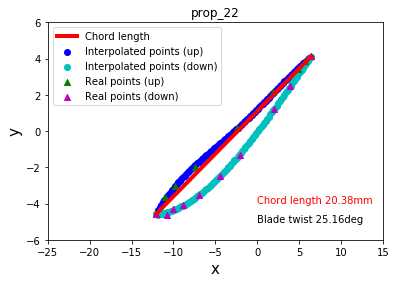

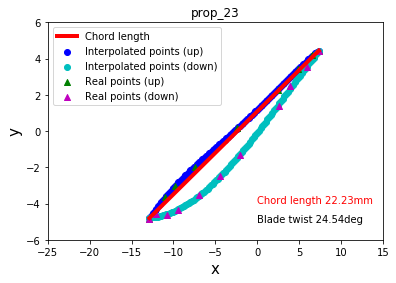

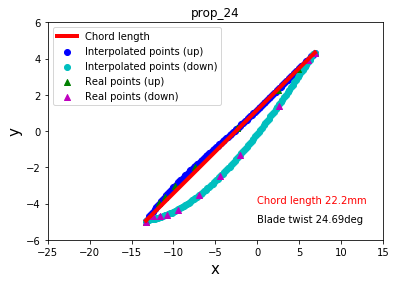

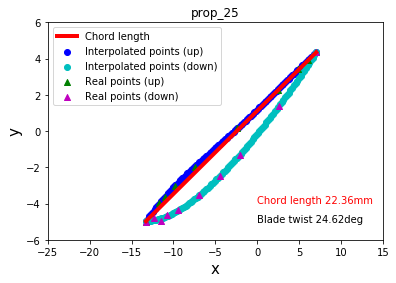

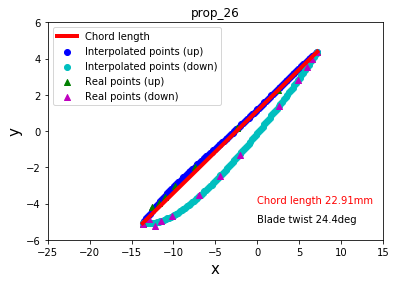

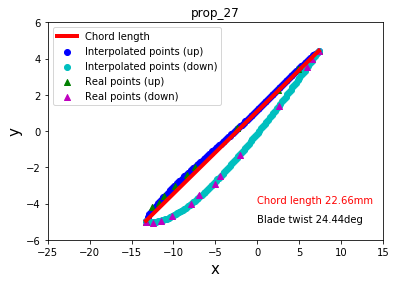

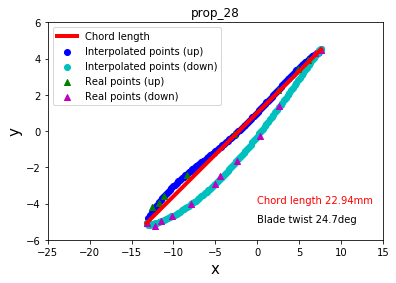

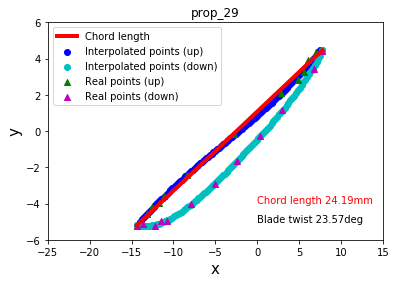

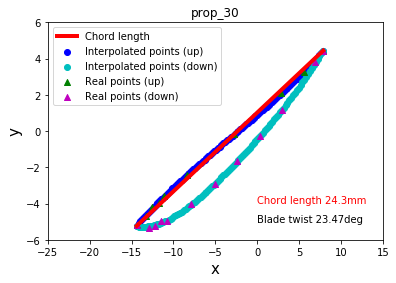

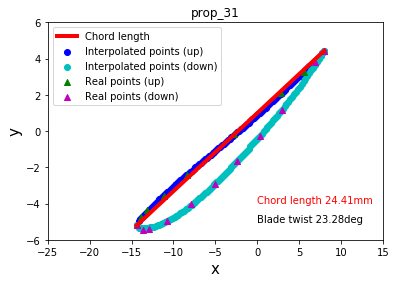

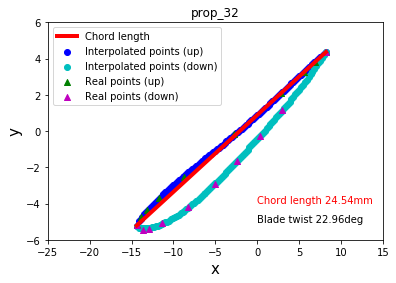

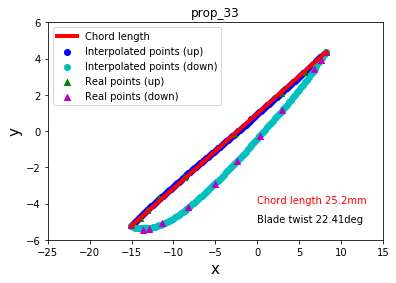

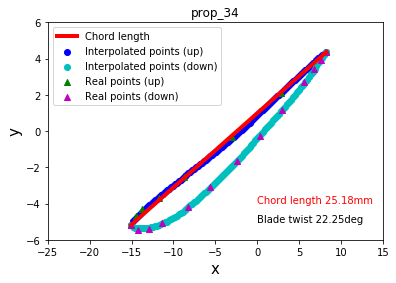

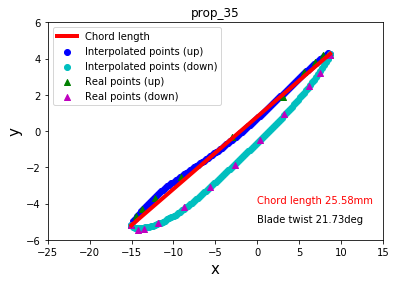

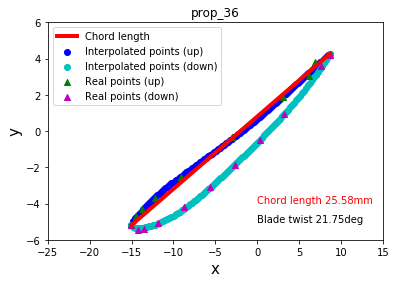

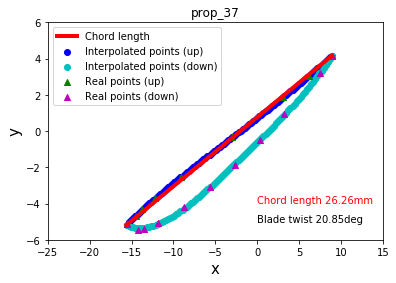

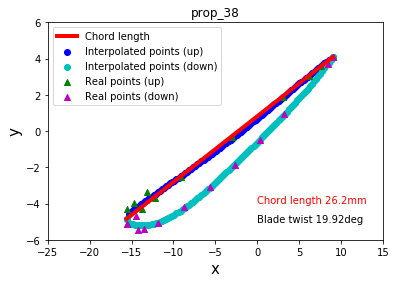

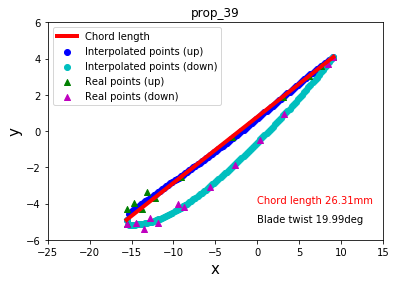

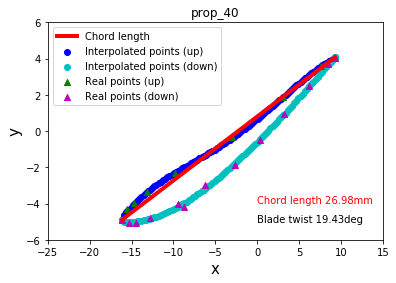

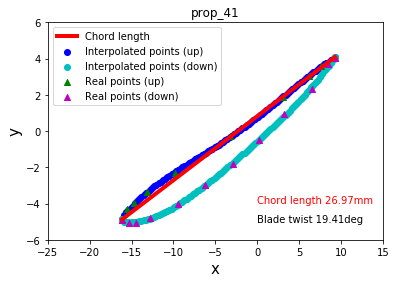

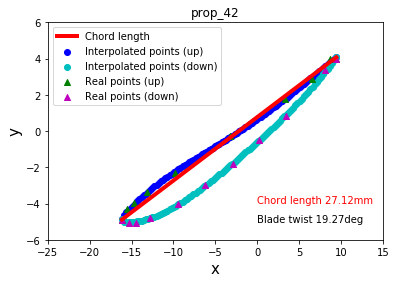

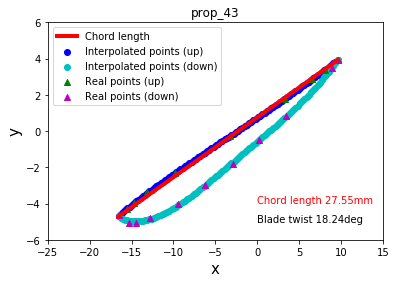

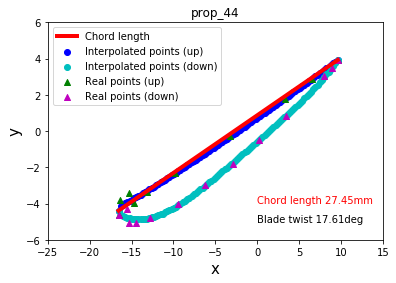

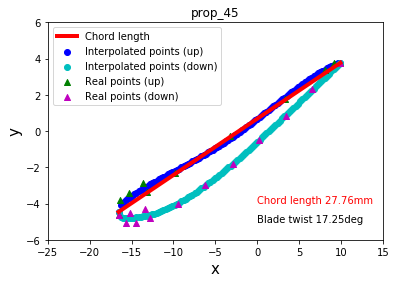

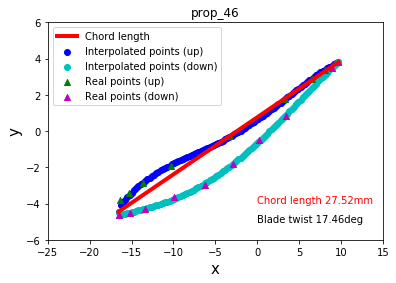

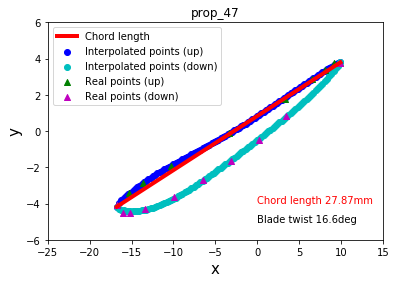

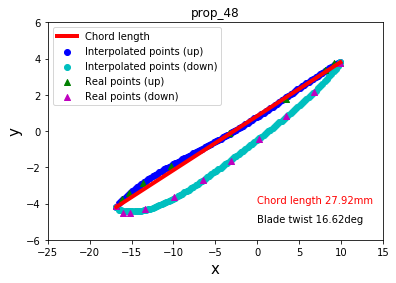

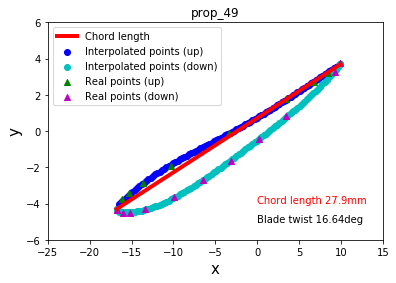

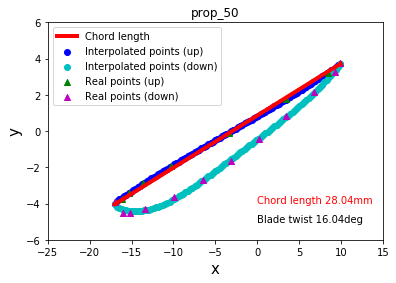

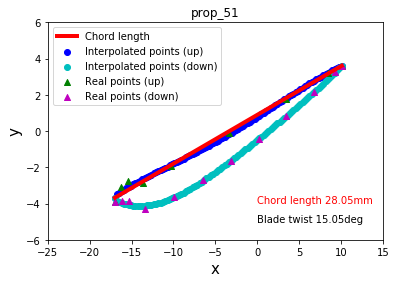

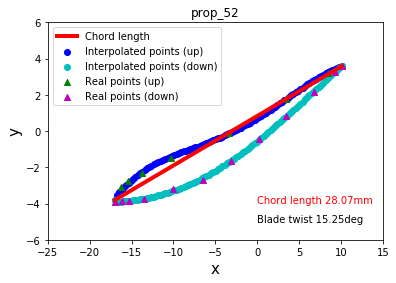

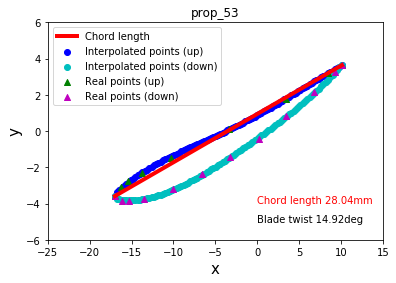

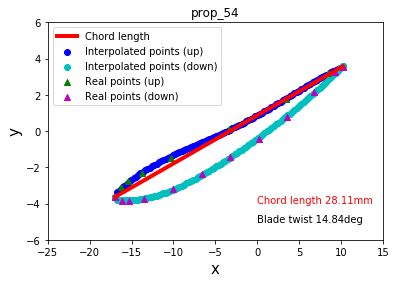

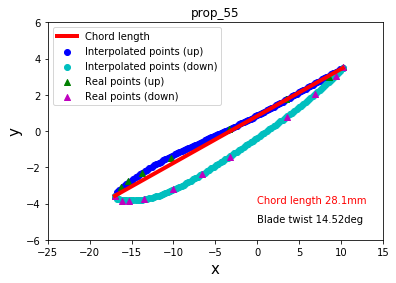

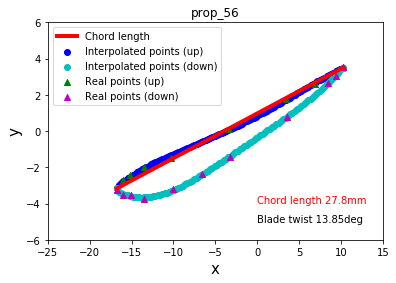

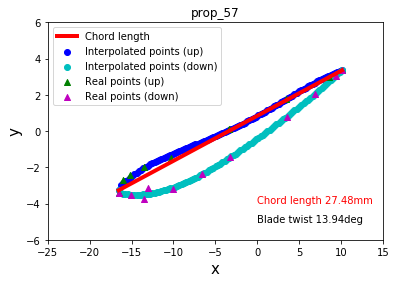

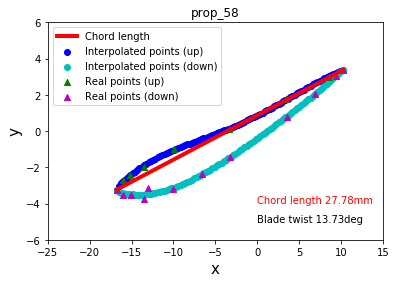

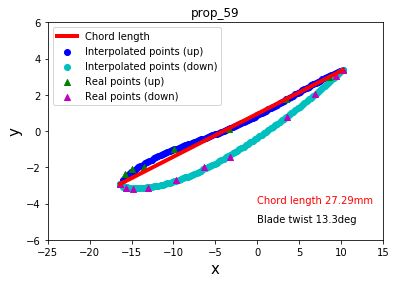

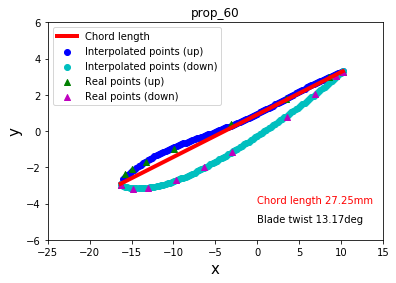

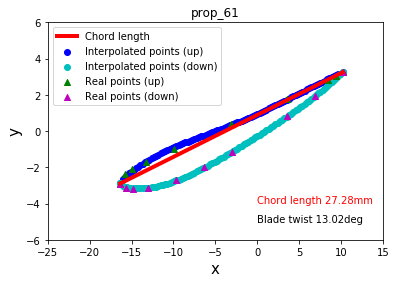

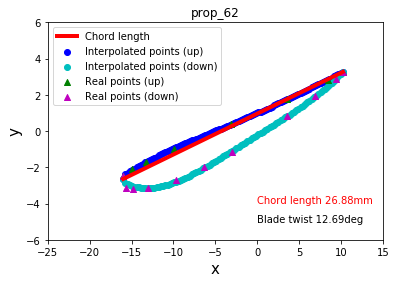

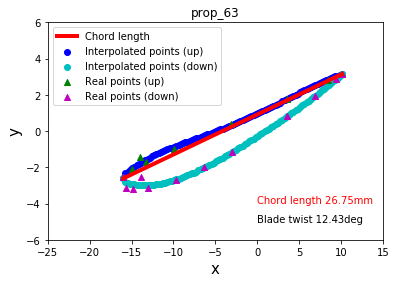

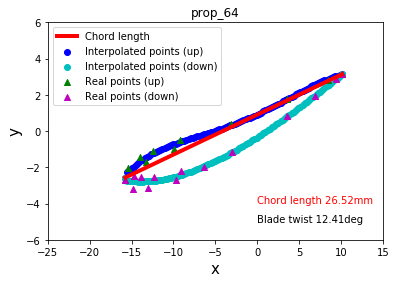

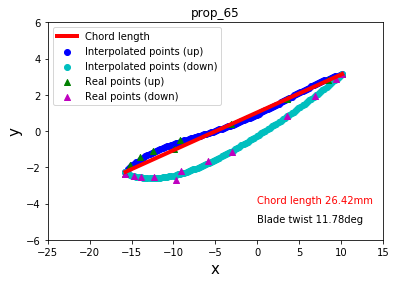

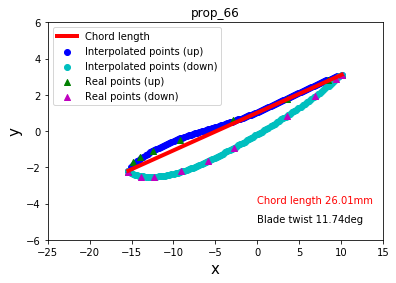

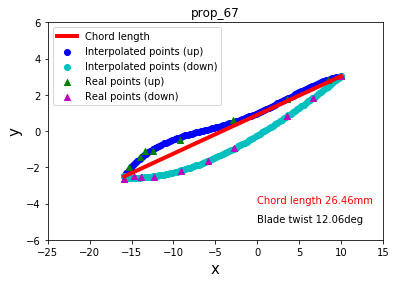

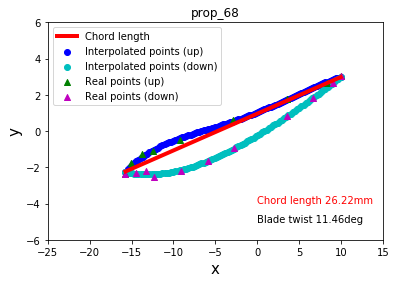

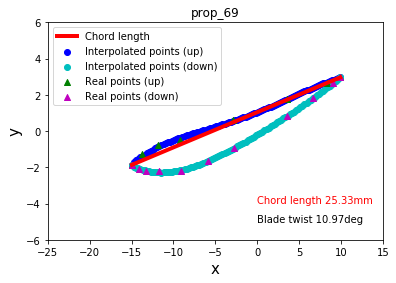

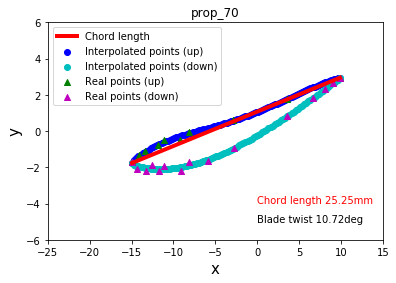

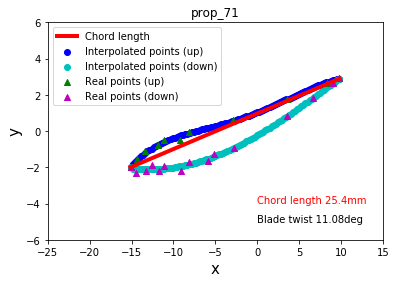

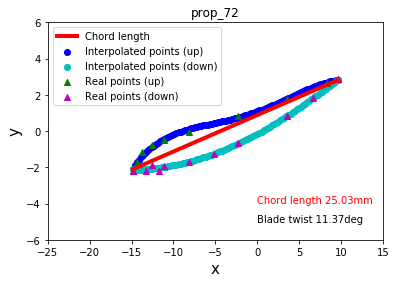

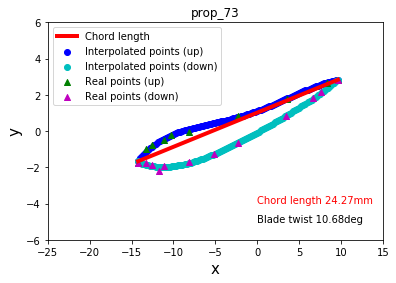

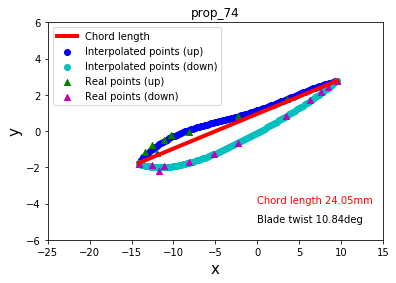

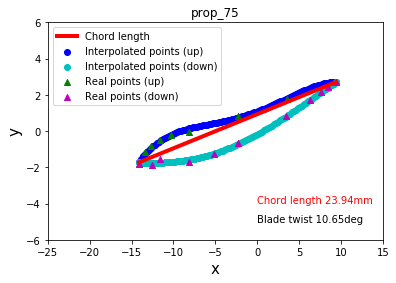

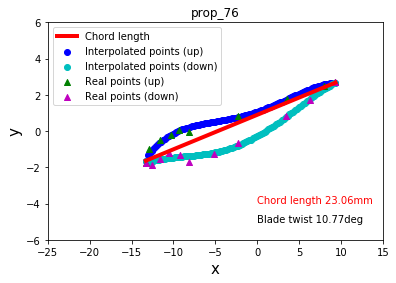

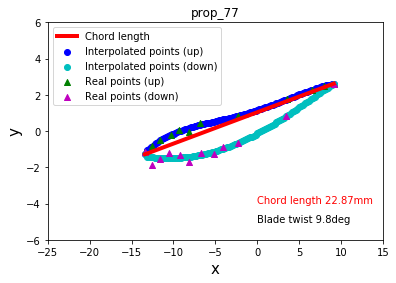

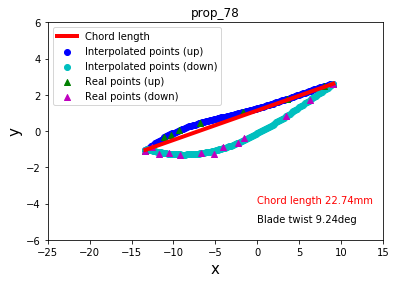

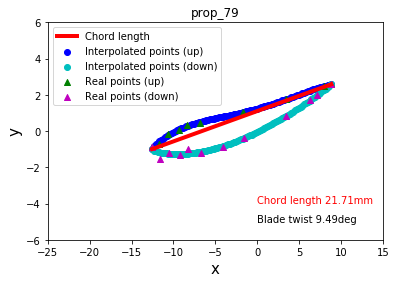

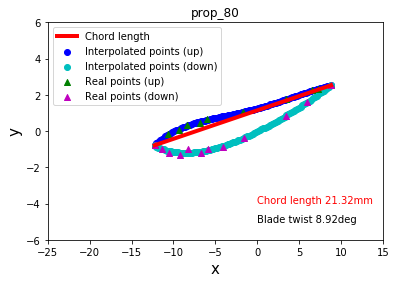

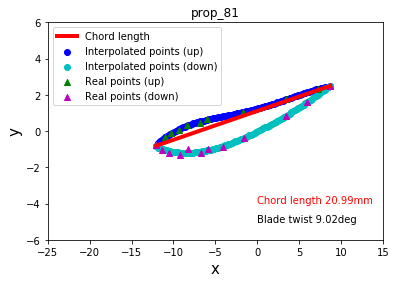

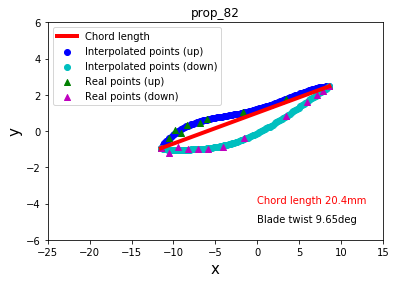

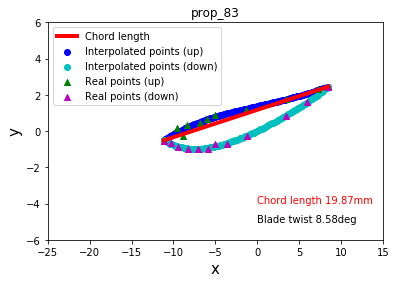

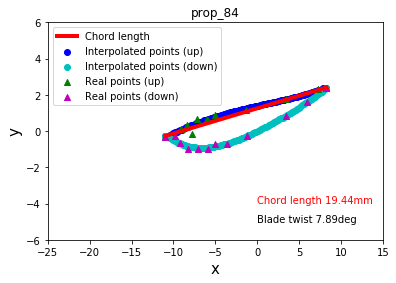

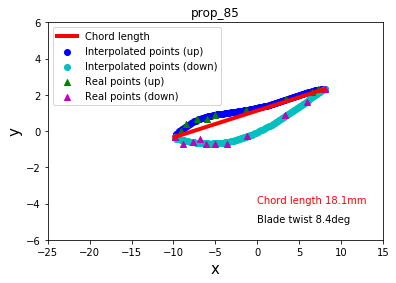

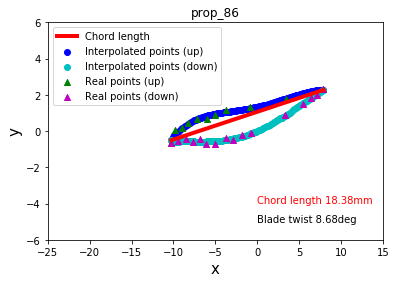

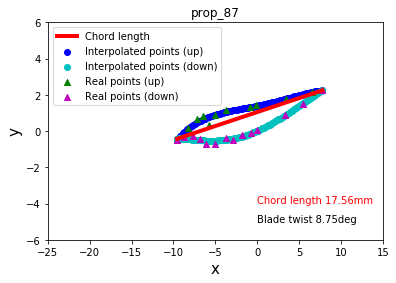

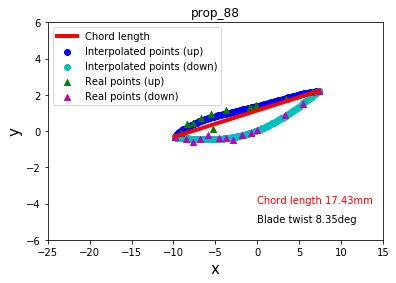

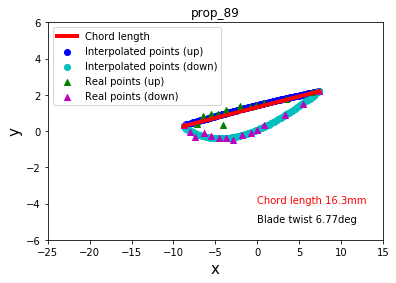

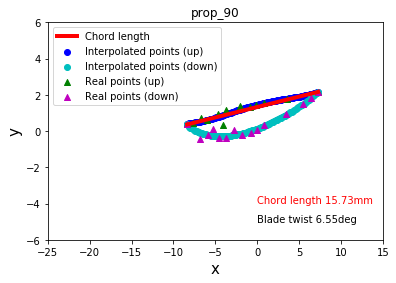

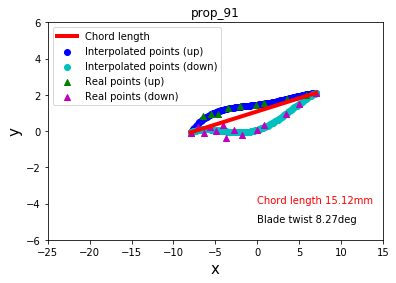

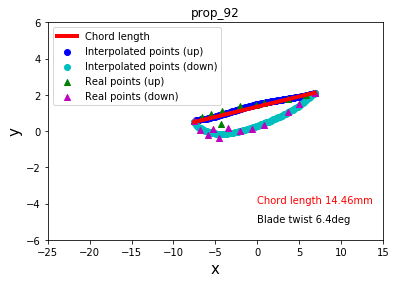

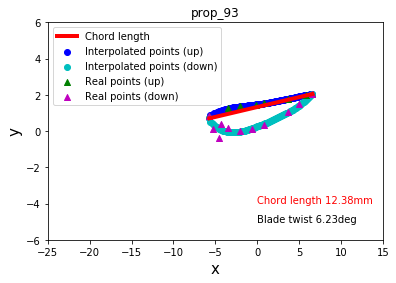

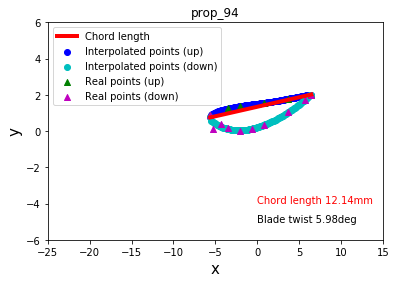

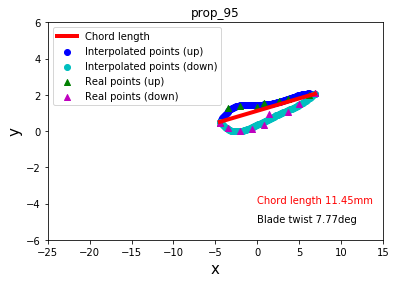

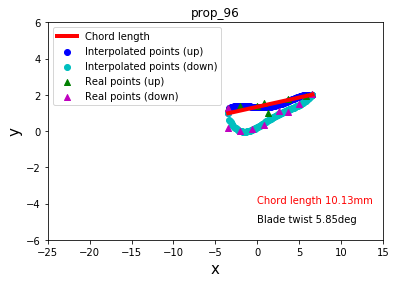

In [85]:
for i in range(len(all_plane_points) - rm):
    plot_interpolation_param(right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "Prop at " + str(position[i]) +"mm", chord_length, blade_twist)